In [1]:
import zipfile
import os

# Path to the uploaded dataset
zip_path = "/content/Poultry Disease Detection.v9i.folder.zip"
extract_path = "/content/poultry_dataset"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [13]:
# Check extracted folders
print(os.listdir(extract_path))

['test', 'train', 'README.dataset.txt', 'valid', 'README.roboflow.txt']


In [24]:
# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import shutil

# Step 3: Fix Class Mismatch Issue
train_dir = "/content/poultry_dataset/train"
valid_dir = "/content/poultry_dataset/valid"

# Remove "Unlabeled" from training if not present in validation
unlabeled_path = os.path.join(train_dir, "Unlabeled")
if os.path.exists(unlabeled_path):
    shutil.rmtree(unlabeled_path)
    print("Removed 'Unlabeled' class from training set to match validation set.")

# Step 4: Image Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

print("Updated Train classes:", train_generator.class_indices)
print("Updated Valid classes:", valid_generator.class_indices)

Found 4260 images belonging to 5 classes.
Found 409 images belonging to 5 classes.
Updated Train classes: {'Bumblefoot': 0, 'Fowlpox': 1, 'Healthy': 2, 'coryza': 3, 'crd': 4}
Updated Valid classes: {'Bumblefoot': 0, 'Fowlpox': 1, 'Healthy': 2, 'coryza': 3, 'crd': 4}


In [25]:
# Step 5: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Dynamically adjust output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("✅ Model is ready!")

✅ Model is ready!


In [21]:
print("Train classes:", train_generator.class_indices)
print("Valid classes:", valid_generator.class_indices)

Train classes: {'Bumblefoot': 0, 'Fowlpox': 1, 'Healthy': 2, 'Unlabeled': 3, 'coryza': 4, 'crd': 5}
Valid classes: {'Bumblefoot': 0, 'Fowlpox': 1, 'Healthy': 2, 'coryza': 3, 'crd': 4}


In [26]:
# Step 6: Train the Model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20
)

Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.3575 - loss: 1.6685 - val_accuracy: 0.5306 - val_loss: 1.1304
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5059 - loss: 1.1263 - val_accuracy: 0.5770 - val_loss: 1.0043
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.5826 - loss: 0.9844 - val_accuracy: 0.6210 - val_loss: 0.9021
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.6725 - loss: 0.8072 - val_accuracy: 0.6308 - val_loss: 0.8652
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7080 - loss: 0.7348 - val_accuracy: 0.6724 - val_loss: 0.8432
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.7890 - loss: 0.5424 - val_accuracy: 0.6846 - val_loss: 0.8590
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8276 - loss: 0.4712 - val_accuracy: 0.6919 - val_loss: 0.9163
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8787 - loss: 0.3511 - val_

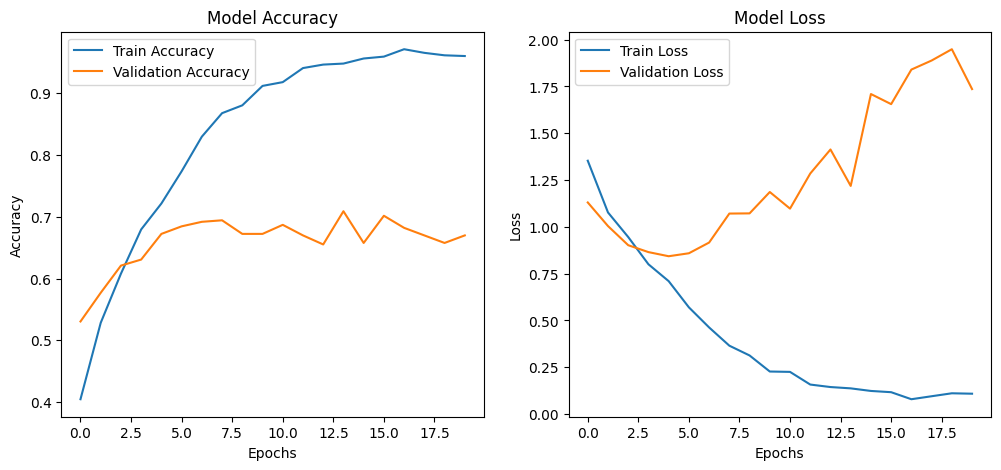

In [27]:
# Step 7: Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))

# Accuracy Graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
# Step 8: Save the Model for Download
model.save("/content/poultry_disease_model.h5")

# Provide Download Link
from google.colab import files
files.download("/content/poultry_disease_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>